<div style="text-align: center; margin: 50px">
<h1 style="color: darkblue; background-color: white; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Gates, Measurement, & Circuits Pt. 1</h3>
<img src="https://raw.githubusercontent.com/Plabrum/qxq_hw/master/images/qubit_logo_doubleQ.png" style="width: 150px">
</div>

## Overview 
#### Practice
1. Single Qubit Gates
    * [1a X Gate](#q1a)
    * [1b Y Gate](#q1b)
    * [1c Z Gate](#q1c)
    * [1d Hadamard & Rphi Gate](#q1d)
2. Single Qubit Circuit measurements
    * [2a Create a superposition](#q2a)
    * [2b Draw histogram](#q2b)

#### Activities
1. Multi Qubit States
    * [1a Statvectors](#q3a)
    * [1b Statvectors](#q3b)
2. Multi Qubit Gates 
    * [2a Using CNOT](#q4a)
    * [2b Draw histogram](#q4b)
    * [2c Creating a 2 qubit state](#q4c)
    * [2d Draw historgram](#q4d)
3. Bell States
    * [3a Phi- Circuit](#q5a)
    * [3b Phi- Histogram](#q5b)
    * [3c Psi+ Circuit](#q5c)
    * [3d Psi+ Histogram](#q5d)
    * [3e Psi- Circuit](#q5e)
    * [3f Psi- Histogram](#q5f)

In [3]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np
# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline

## How to use Qiskit!
The `QuantumCircuit` class is qiskit's way of designing a quanutm circuit, it takes two inputs: `qubtis` and `classical bits` which tell the circuit how many qubits and classical bits to use.

We can build a quantum circuit in qiskit with the following:
```python
circ = QuantumCircuit(q,c)
```

In [4]:
# This creates a quantum circuit object
circ = q.QuantumCircuit(1,1)

### Drawing and Displaying Circuits

Qiskit has a function `circ.draw(output="mpl")` for drawing a diagram of circuits, to make sure the image is displayed in our IPython notebook we can use the `display()` function.

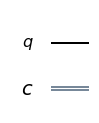

In [5]:
# This prints out a diagram of the circuit, the "mpl" makes it look pretty!
display(circ.draw(output="mpl"))

### Adding gates to a quantum circuit
This can be done by calling the `circ.gate(qubit)` command. 
Here the `gate` refers to the gate type, and the `qubit` refers to the qubit (or qubits) on which the gate is acting

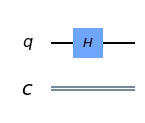

In [6]:
# Adding a NOT gate (aka an X gate) to qubit 0
circ.h(0)
display(circ.draw(output="mpl"))

<a id="q1a"></a>
# Practice: Implementing single qubit gates
## Single Qubit Gates

### *The X Gate* 
The X gate rotates the state vector by $\pi$ radians about the x-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}
$$

The syntax for an X gate is: `circ.x(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1a:**
Initialize a new circuit and add an X gate to it, then draw it.

<a id="q1b"></a>

### *The Y Gate* 

The Y gate rotates the state vector by $\pi$ radians about the y-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  0 & -i \\
  i & 0
 \end{bmatrix}
$$

The syntax for a Y gate is: `circ.y(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1b:**
Initialize a new circuit and add a Y gate to it, then draw it.

<a id="q1c"></a>
### The Z Gate

The Z gate rotates the state vector by $\pi$ radians about the z-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  1 & 0 \\
  0 & -1
 \end{bmatrix}
$$

The syntax for a Z gate is: `circ.z(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1c:**
Initialize a new circuit and add a Z gate to it, then draw it.

<a id="q4"></a>
# Activity 4: The Qasm simulator

### 4 a) Using the above walkthrough of the `qasm_simulator`, try and simulate the Phi- bell state from the last homework:
$$
| \Phi^- \rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle 
$$

Remember that this circuit must be defined with 2 classical and 2 quantum bits: `q.QuantumCircuit(2,2)`

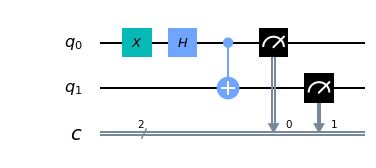

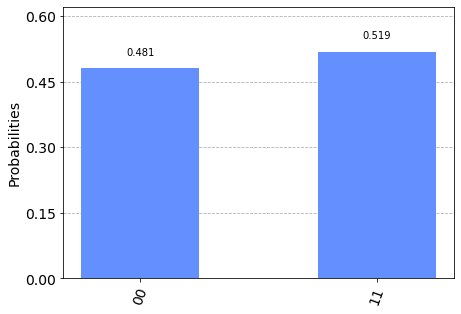

In [178]:
# Solution
phi_minus = q.QuantumCircuit(2,2)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.measure([0,1], [0,1])
display(phi_minus.draw(output="mpl"))
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(phi_minus, backend)
result = job.result()
counts = result.get_counts(phi_minus)
graph = q.visualization.plot_histogram(counts)
display(graph)

### 4b) Now that you're getting used to the noisy simulator, simualte the circuit from question 3 using the noisy simulator.

This circuit should look very similar to the statevector simulator due to no superpositions occuring.

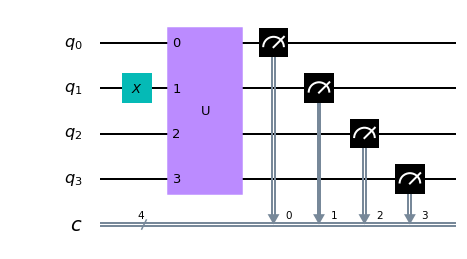

In [179]:
# Solution
circ = q.QuantumCircuit(4,4)
circ.x(1)
op = q.quantum_info.Operator(U)
circ.unitary(op, [0,1,2,3], label='U')
circ.measure([0,1,2,3], [0,1,2,3])
display(circ.draw(output="mpl"))

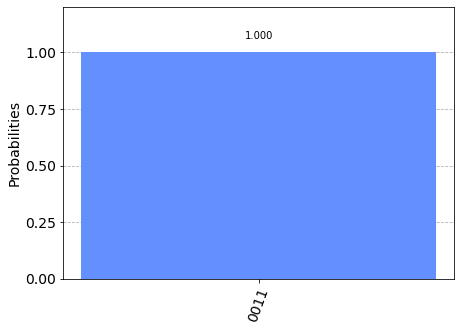

In [180]:
#Solution
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(circ, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circ)
graph = q.visualization.plot_histogram(counts)
display(graph)

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*